In [1]:
pip install igraph

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import igraph as ig
from igraph import *
import matplotlib.pyplot as plt

### File loading

In [2]:
corsi        = pd.read_csv("Networks/Corso.csv")
partecipanti = pd.read_csv("Networks/Partecipanti.csv")

In [3]:
nodes_number = len(corsi) + len(partecipanti)
grafo        = ig.Graph()
grafo.add_vertices(nodes_number)

In [4]:
corso = grafo.vs[0]
for row_id, row in corsi.iterrows():
    for key, val in row.items():
        corso[key]= val
corso["Tipo"] = "Corso"

In [5]:
partecipanti_ig = grafo.vs[1:]
params_users    = list(partecipanti.columns)
for param in params_users:
    partecipanti_ig[param] = partecipanti[param].to_list()
partecipanti_ig["Tipo"] = "Partecipante"

In [6]:
# Creazione degli archi
edges = [(i,0) for i in range(1, 5)]
grafo.add_edges(edges)
grafo.es["Tipo"] = "Segue"

In [7]:
grafo.add_vertices(2)
children = grafo.vs[5:]
children["Nome"]  = ["Marco", "Mara"]
children["Cognome"] = ["Re", "Re"]
children["Eta"]    = [1, 3]
children["Tipo"]   = ["Figlio", "Figlio"]
grafo.add_edges([(5,4), (6,4)])

In [8]:
selected_edges = grafo.es.select(_within=[4,5,6])
selected_edges["Tipo"] = "Parentela"

In [ ]:
#https://igraph.org/python/tutorial/0.9.8/tutorial.html#vertex-attributes-controlling-graph-plots

In [13]:
colori_nodi = {
    "Corso": "green",
    "Partecipante": "orange",
    "Figlio": "red"
}
nodi_size = {
    "Corso": 80,
    "Partecipante": 40,
    "Figlio": 20
}

In [21]:
for node in grafo.vs:
    node["color"] = colori_nodi[node["Tipo"]]
    node["size"]  = nodi_size[node["Tipo"]]
    
for node in grafo.vs[1:]:
    node["label"] = node["Nome"] + " " + node["Cognome"]
    node["label_dist"] = -1.5
    
corso = grafo.vs[0]
corso["label"] = corso["Corso"] 
corso["label_dist"] = -1.5

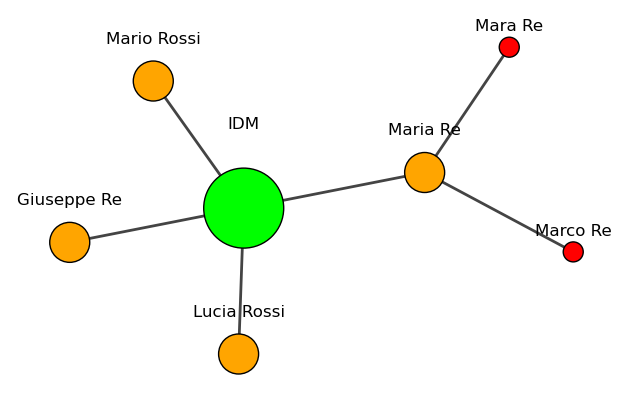

In [22]:
fig, ax = plt.subplots(figsize=(8,5))
ig.plot(
   grafo,  
   target       = ax,
)
plt.show()

In [25]:
grafo.vs.degree()

[4, 1, 1, 1, 3, 1, 1]